## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [4]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

df=pd.read_csv('data/kc_house_data.csv')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np


In [2]:
# !pip install -U scikit-learn

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
subset=['id','date','view','sqft_above','sqft_basement','zipcode','yr_renovated','lat','long','sqft_living15','sqft_lot15']

In [6]:
df.drop(columns=subset,axis=1,inplace=True)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [9]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [10]:
df['waterfront'].isna().sum()/len(df['waterfront'])

0.11001527989998611

In [11]:
df['waterfront'].fillna(0,inplace=True)

In [12]:
df['waterfront'].unique()

array([0., 1.])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     21597 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [14]:
df.dtypes


price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [15]:
df['waterfront'].isna().any()

False

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [18]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [ ]:
plt.boxplot(df)

In [19]:
# categorical=['waterfront','condition','grade']

In [20]:
#  numeric=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']

In [21]:
# df.hist(figsize=(20,25))

In [22]:
# pd.plotting.scatter_matrix(df,figsize  = [20, 20]);
# plt.show()

In [23]:
# sm = pd.plotting.scatter_matrix(df, figsize=[20, 20]);

# # Rotates the text
# [s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
# [s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# #May need to offset label when rotating to prevent overlap of figure
# [s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

# #Hide all ticks
# [s.set_xticks(()) for s in sm.reshape(-1)]
# [s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()

In [24]:
# sns.pairplot(df)

In [5]:
X=df.drop(['price'],axis=1)
y=df['price']

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [10]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

ValueError: could not convert string to float: '3/4/2015'

In [30]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
train_pred=linreg.predict(X_train_scaled)
test_pred=linreg.predict(X_test_scaled)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")


Train R2:0.6515759330757775
Test R2:0.6277636141698013
-------------
Train RMSE:216237.3138862162
Test RMSE:225988.32795807114


In [34]:
categorical=['condition','grade']

In [35]:
df[categorical]

,waterfront,condition,grade
0,0.0,3,7
1,0.0,3,7
2,0.0,3,6
3,0.0,5,7
4,0.0,3,8
...,...,...,...
21592,0.0,3,8
21593,0.0,3,8
21594,0.0,3,7
21595,0.0,3,8


In [36]:
df_cate=pd.get_dummies(df,columns=categorical,drop_first=True)

In [37]:
df_cate

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.0,3,1.00,1180,5650,1.0,1955,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,1951,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21593,400000.0,4,2.50,2310,5813,2.0,2014,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21594,402101.0,2,0.75,1020,1350,2.0,2009,0,0,1,...,0,0,0,1,0,0,0,0,0,0
21595,400000.0,3,2.50,1600,2388,2.0,2004,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [38]:
X=df_cate.drop(['price'],axis=1)
y=df_cate['price']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
linreg1=LinearRegression()
linreg1.fit(X_train_scaled,y_train)

LinearRegression()

In [42]:
train_pred=linreg1.predict(X_train_scaled)
test_pred=linreg1.predict(X_test_scaled)

In [43]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6805353670752812
Test R2:0.6487003210271545
-------------
Train RMSE:207056.06578197383
Test RMSE:219540.91703744637


In [44]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


In [45]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,False,True,False,False
grade,False,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,False,True


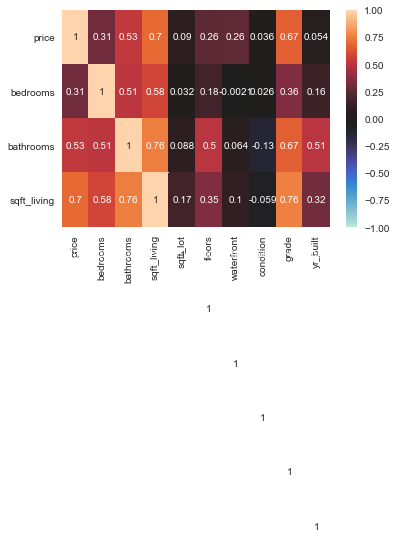

In [46]:
figsize=(20,20)
ax=sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, center= 0)
ax.set_ylim(4,0)
plt.show()

In [47]:
# [bathroom,sqft_living]
# [sqft_living,bathroom]
# [sqft_living,grade]


In [48]:
X=df_cate.drop(['price','sqft_living'],axis=1)
y=df_cate['price']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [50]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
linreg2=LinearRegression()
linreg2.fit(X_train_scaled,y_train)

LinearRegression()

In [52]:
train_pred=linreg2.predict(X_train_scaled)
test_pred=linreg2.predict(X_test_scaled)

In [53]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6545751820137441
Test R2:0.6122619371358613
-------------
Train RMSE:215304.6124446798
Test RMSE:230645.94072863733


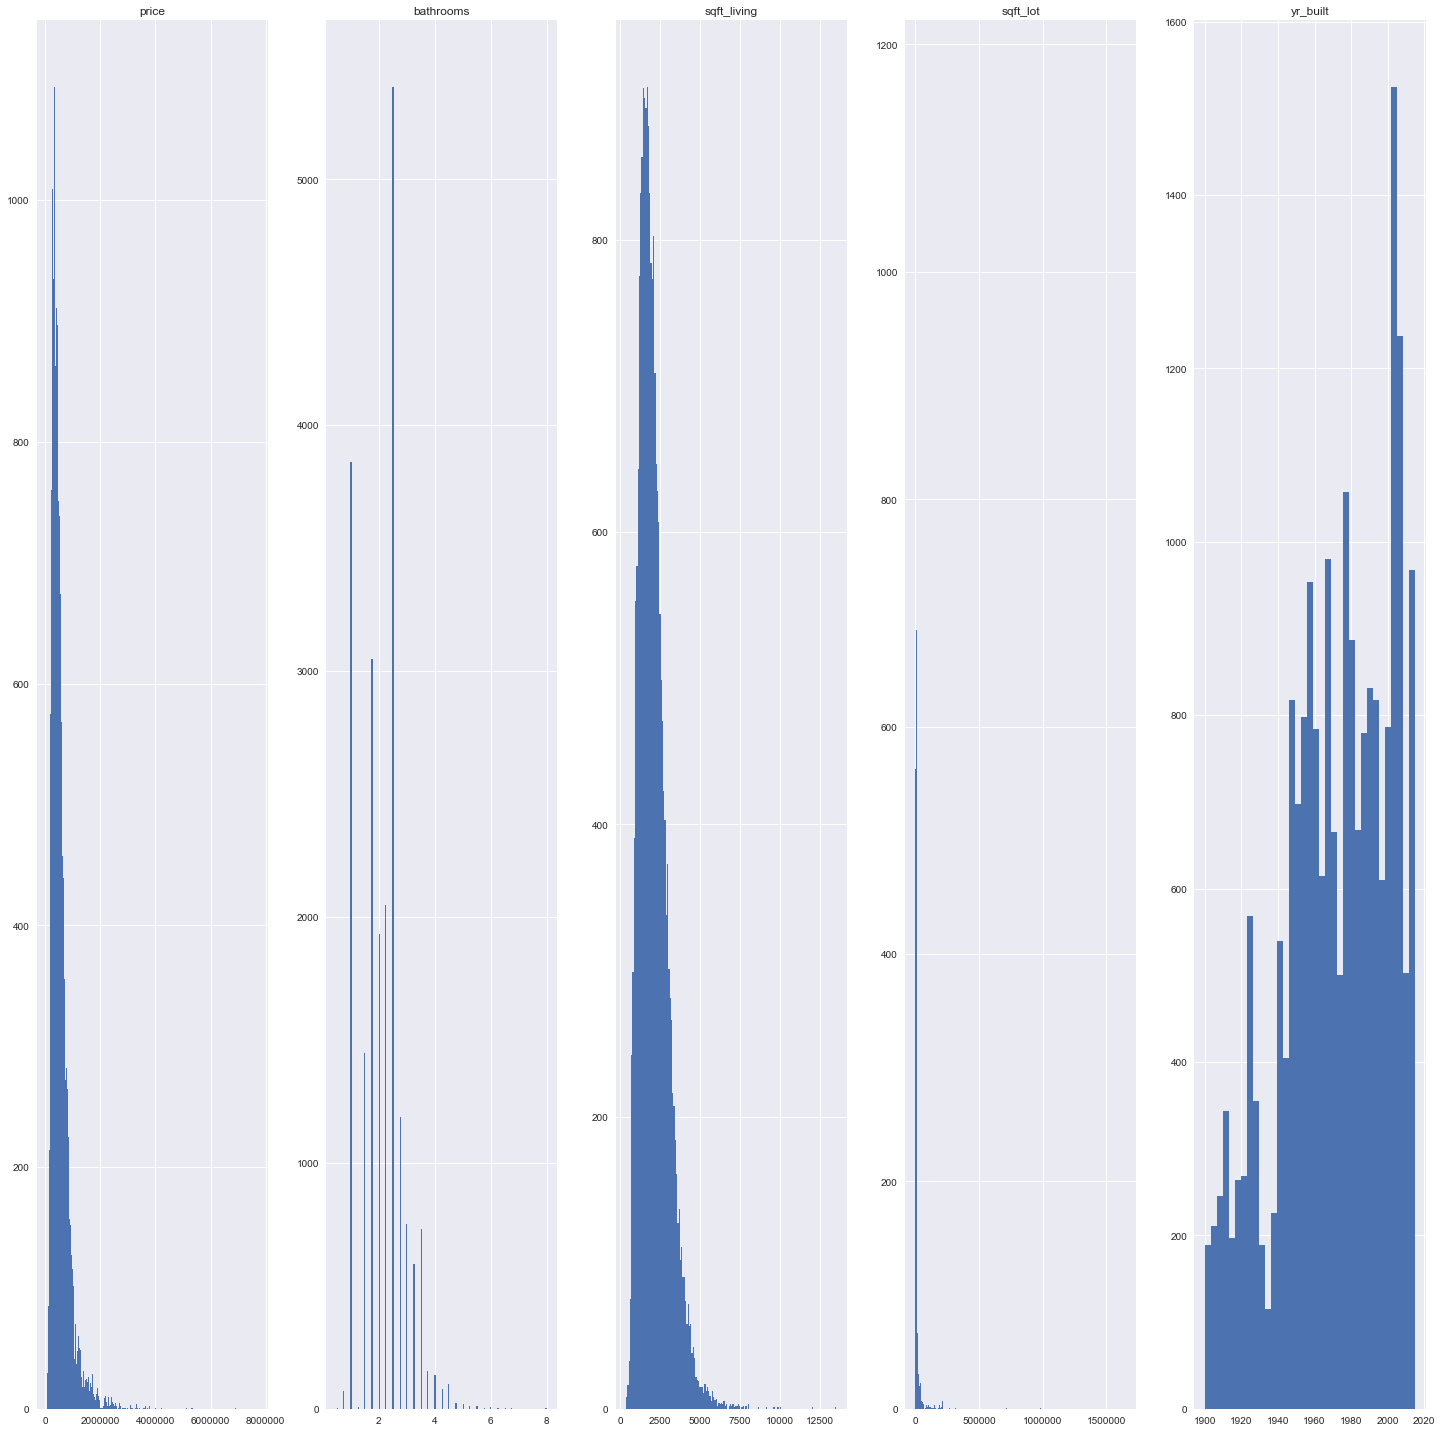

In [54]:
new_df=df.loc[:,((df.dtypes!='object')&(df.nunique()>20))]
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(20,20))
data_val=[cols for cols in new_df.columns]
for col ,ax in zip(data_val,axes.flatten()):
    ax.hist(df[col], bins='auto')
    ax.set_title(col)
fig.tight_layout()

In [55]:
data1=['price','sqft_living','sqft_lot']

In [56]:
continous_df=df[data1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92945812e8>,
      dtype=object)

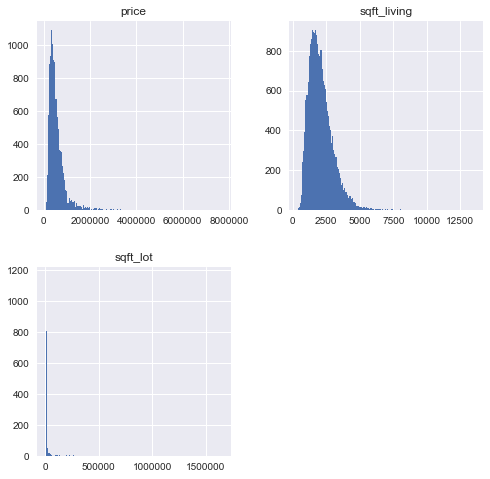

In [57]:
continous_df.hist(figsize=(8,8),bins='auto')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f927dad7a20>,
      dtype=object)

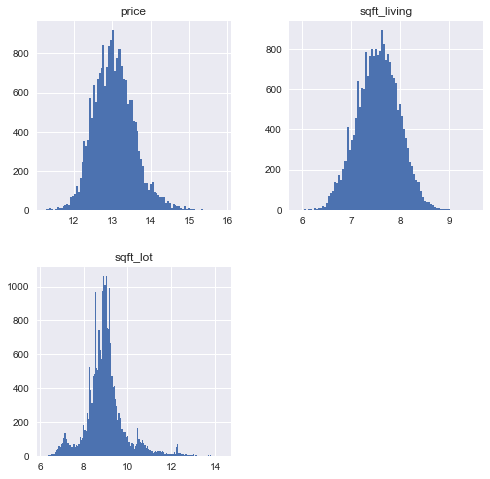

In [58]:
df_log=np.log(continous_df)
df_log.hist(figsize=(8,8),bins='auto')

In [59]:
def normalise(data):
    return (data-np.mean(data))/np.std(data)
stand_df=normalise(df_log)

In [60]:
df_cate_data=df_cate.drop(['price','sqft_living','sqft_lot'],axis=1)

In [61]:
preprocessed = pd.concat([stand_df, df_cate_data], axis=1)

In [62]:
df_cate.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.0,3,1.00,1180,5650,1.0,1955,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,1951,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [63]:
df_cate.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'yr_built', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13'],
      dtype='object')

In [64]:
df_cate.shape

(21597, 22)

In [65]:
stand_df.columns

Index(['price', 'sqft_living', 'sqft_lot'], dtype='object')

In [66]:
stand_df.shape

(21597, 3)

In [67]:
preprocessed.shape

(21597, 22)

In [68]:
preprocessed.columns

Index(['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',
       'yr_built', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13'],
      dtype='object')

In [69]:
stand_df.head()

,price,sqft_living,sqft_lot
0,-1.402030,-1.125582,-0.388439
1,0.279945,0.709463,-0.113243
2,-1.799472,-2.131943,0.244481
3,0.499710,0.070676,-0.523926
4,0.178438,-0.292732,0.008140


In [70]:
preprocessed.head()

,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-1.402030,-1.125582,-0.388439,3,1.00,1.0,1955,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.279945,0.709463,-0.113243,3,2.25,2.0,1951,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-1.799472,-2.131943,0.244481,2,1.00,1.0,1933,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0.499710,0.070676,-0.523926,4,3.00,1.0,1965,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.178438,-0.292732,0.008140,3,2.00,1.0,1987,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [71]:
X=preprocessed.drop('price',axis=1)
y=preprocessed['price']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [73]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [74]:
linreg3=LinearRegression()
linreg3.fit(X_train_scaled,y_train)

LinearRegression()

In [75]:
train_pred=linreg3.predict(X_train_scaled)
test_pred=linreg3.predict(X_test_scaled)

In [76]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6530337757168592
Test R2:0.63073696461042
-------------
Train RMSE:0.5899737522789702
Test RMSE:0.6047348814140134


In [77]:
X=preprocessed.drop(['price','sqft_living'],axis=1)
y=preprocessed['price']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [79]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [80]:
linreg4=LinearRegression()
linreg4.fit(X_train_scaled,y_train)

LinearRegression()

In [81]:
train_pred=linreg4.predict(X_train_scaled)
test_pred=linreg4.predict(X_test_scaled)

In [82]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6262891781132561
Test R2:0.6012978747334304
-------------
Train RMSE:0.6122896630869814
Test RMSE:0.6283785869651386


In [86]:
X=preprocessed[['sqft_lot','bathrooms']]
y=preprocessed['price']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [88]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [92]:
# linreg1=LinearRegression()
linreg3.fit(X_train_scaled,y_train)

LinearRegression()

In [93]:
train_pred=linreg3.predict(X_train_scaled)
test_pred=linreg3.predict(X_test_scaled)

In [94]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.31415965506751165
Test R2:0.30041035677600725
-------------
Train RMSE:0.8294698505824255
Test RMSE:0.8323745397331785


In [33]:
# df_cate=pd.get_dummies(df[categorical],prefix=categorical,drop_first=True)
# df_preprocessed=df.drop(categorical,axis=1)
# df_preprocessed=pd.concat([df_preprocessed,df_cate],axis=1)

df_cate=pd.get_dummies(df,columns=categorical,drop_first=True)

# category=['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']
# dummies=pd.get_dummies(df[category],prefix=category,drop_first=True)
# df_preprocessed=df.drop(category,axis=1)
# df_preprocessed=pd.concat([df_preprocessed,dummies],axis=1)
# dummies

In [34]:
df_cate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,0,0,...,0,0,0,0,1,0,0,0,0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,2001,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,2008,0,0,...,0,0,0,0,1,0,0,0,0,0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,0,0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,0,0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
# x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','waterfront','condition','grade']

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
# encoder=OneHotEncoder(drop='first')
# ct=ColumnTransformer(transformers=[
#    ('ohe',encoder,categorical)
# ],remainder='passthrough')
# ct.fit(df[x_cols])
# X=ct.transform(df[x_cols])


In [38]:
X=df_cate.drop('price',axis=1)
y=df_cate['price']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [40]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [72]:
train_pred=linreg.predict(X_train_scaled)
test_pred=linreg.predict(X_test_scaled)


In [43]:
print(f"Train R2:{r2_score(y_train,train_pred)}")
print(f"Test R2:{r2_score(y_test,test_pred)}")
print('-------------')
print(f"Train RMSE:{mean_squared_error(y_train,train_pred,squared=False)}")
print(f"Test RMSE:{mean_squared_error(y_test,test_pred,squared=False)}")

Train R2:0.6822600085252322
Test R2:0.6570163265820818
-------------
Train MSE:212230.36615633365
Test MSE:210294.13871000567


In [54]:
df_cate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,0,0,...,0,0,0,0,1,0,0,0,0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,2001,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.hea